<span class="mark">Análisis de Cohorte / Análisis de grupos de clientes</span>

(Segmentación por comportamientos o una característica en común)

<span class="mark">Tipo de negocio objetivo : E-commerce</span>

Agrupar usuarios según la fecha de su primera compra

Agrupar usuarios según la fecha de la primera interacción con una campaña de MKT específica

Agrupar usuarios según la primera vez que descargaron tu aplicación o visitaron tu sitio web


*"los E-commerce pueden utilizar el análisis de grupos de clientes para mucho más que para la retención"*

BENEFICIOS:

El análisis de grupos de clientes permite comprender el comportamiento de los clientes a lo largo del tiempo, lo que es un beneficio clave. Si no se realiza la segmentación de los clientes en grupos, puede resultar difícil evaluar el impacto de estrategias como la personalización o la optimización de la conversión en el crecimiento o la disminución de la empresa.


HACER SEGUIMIENTO Y COMPRENCIÓN DEL CHURN RATE:

El churn rate es la tasa de pérdida de clientes o tasa de abandono, Pongo un ejemplo, si una empresa tiene 100 clientes al inicio del mes y al final del mismo cuenta con 90 clientes, entonces la tasa de abandono sería del 10%.

IDENTIFICANDO SEGMENTOS POR COMPORTAMIENTO SE PUEDEN CREAR CAMPAÑAS Y EXPERIENCIAS PERSONALIZADAS: 

Por ejemplo, puedes preguntarte qué tipo de experiencias debes ofrecer a clientes que se han dado de baja recientemente, en comparación con los que regresan con frecuencia o los nuevos en tu sitio web. El análisis de cohorte te ayuda a responder estas preguntas y crear ofertas más atractivas.


CÓMO MEJORAMOS LAS PRÁCTICAS:


1.Optimizar campañas post-compra: Identificamos cuándo los clientes vuelven y compran nuevamente. Al convertir las métricas globales del Valor de Vida del Cliente (LTV) en medidas prácticas en periodos específicos, como 30 o 60 días, puedes evaluar eficientemente el retorno de inversión y entender los ingresos generados por los clientes en cada momento.


2.Segmetar por propiedades: Es crucial segmentar datos por canales, campañas de marketing y productos para comprender el comportamiento único de los clientes. La comprensión profunda de la relación con la marca, especialmente entre los clientes nuevos y los inscritos en programas de fidelización, proporciona insights clave sobre segmentos de clientes importantes.


3.Mejorar el CAC es el objetivo: Ante el aumento en los costos de adquisición, evalúo el impacto de descuentos distinguiendo entre quienes compraron con y sin descuento. Comparando sus comportamientos durante 90 días, obtengo insights sobre la lealtad o pérdidas generadas.


4.Mejorar campañas de bienvenida: Optimizo campañas de bienvenida mediante pruebas AB y análisis de cohortes para identificar la serie más efectiva. Esto se logra observando rápidamente el comportamiento de segmentos en períodos de 30 y 60 días, convirtiendo nuevos visitantes en clientes recurrentes.


In [8]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
data = pd.read_csv('ventas-por-factura.csv')
data.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [10]:
# Reemplazar la coma por el punto decimal y convertir a float
data['Monto'] = data['Monto'].str.replace(',', '.').astype(float)

# Verificar el tipo de dato de la columna
print(data.dtypes)


N° de factura        object
Fecha de factura     object
ID Cliente          float64
País                 object
Cantidad              int64
Monto               float64
dtype: object


A simple vista podemos interpretar ese registro de la siguiente forma: el cliente ID 15528 de United Kingdom hizo una compra el 30 de marzo del 2021 a las 4:14PM por un monto de 229.33 libras esterlinas que incluye 123 productos, y que generó la factura cuyo número es el 548370.

In [11]:
#Realizaremos una revisión básica sobre los datos, para asegurarnos de no tener nulos o vacíos,
#de ser así según mi criterio procederé a anular o completar:
data.isnull().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [12]:
# Eliminar las filas con valores vacíos en la columna "ID de cliente"
data = data.dropna(subset=['ID Cliente'])

data.isnull().sum()

N° de factura       0
Fecha de factura    0
ID Cliente          0
País                0
Cantidad            0
Monto               0
dtype: int64

Noya: Voy a centrarme en verificar si tenemos Nº de Factura duplicados ya que se supone que cada factura tiene un valor único, entonces si encontramos otra fila con el mismo número de factura debería ser borrado. Utilizaré una función que nos devuelva una serie booleana indicando True si el valor de la fila es un duplicado de un valor anterior en la columna, y False si no lo es.  Para contar los valores duplicados, se puede usar la función sum() en la serie booleana de duplicados:

In [13]:
duplicados = data['ID Cliente'].duplicated()
duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
25947     True
25948     True
25949     True
25950     True
25951     True
Name: ID Cliente, Length: 22229, dtype: bool

In [14]:
num_duplicados = duplicados.sum()
num_duplicados

17857

In [15]:
#Crearé un nuevo DataFrame llamado df que contiene solo las filas únicas en la columna "ID Cliente"
#del DataFrame original data y debajo mostraré que ahora la
#serie booleana es devuelta toda como False:

df = data.drop_duplicates(subset=['ID Cliente'])
df['ID Cliente'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25858    False
25862    False
25903    False
25924    False
25941    False
Name: ID Cliente, Length: 4372, dtype: bool

Nota: En el Dataframe podemos observar las facturas que comienzan con la letra C corresponden a devoluciones , al ser valores negativos no vamos a tratarlos, nos vamos a centrar en las ventas y no en las devoluciones.

In [16]:
#Este sería el DF con el que vamos a realizar el análisis de métricas de ventas
#Eliminaré filas que contengan valores negativos en la columna 'Cantidad'
df = df[df['Cantidad'] >= 0]
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
25841,566405,9/12/2021 13:41:00,17919.0,United Kingdom,756,1304.04
25858,568100,9/23/2021 15:20:00,15475.0,United Kingdom,319,454.11
25903,558294,6/28/2021 10:37:00,16545.0,United Kingdom,78,339.30
25924,568215,9/26/2021 8:38:00,13390.0,United Kingdom,224,544.08


In [27]:
# Ahora realizaremos un análisis utilizando la columna Fecha de factura
# Vamos a modificar si es necesario el Dtype y luego 
df.dtypes

N° de factura        object
Fecha de factura     object
ID Cliente          float64
País                 object
Cantidad              int64
Monto               float64
dtype: object

In [30]:
# Convertir la columna 'Fecha de factura' a formato de fecha
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'])

# Crear nuevas columnas 'Año' y 'Mes' a partir de 'Fecha de factura'
df['Año'] = df['Fecha de factura'].dt.year
df['Mes'] = df['Fecha de factura'].dt.month

# Verificar los tipos de datos
print(df.dtypes)

N° de factura               object
Fecha de factura    datetime64[ns]
ID Cliente                 float64
País                        object
Cantidad                     int64
Monto                      float64
Año                          int64
Mes                          int64
dtype: object


## Número de facturas por país y el porcentaje que representa:

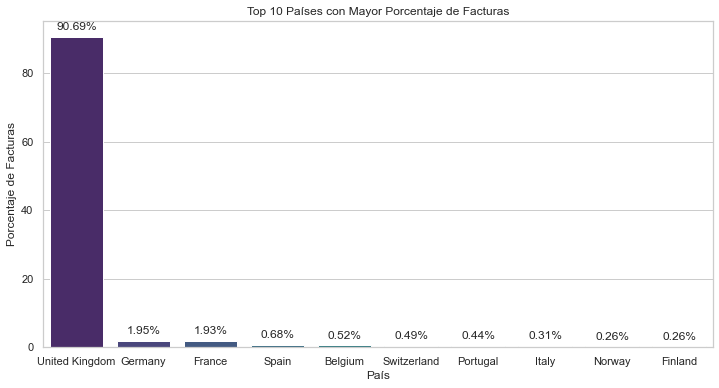

              País  N° de factura  Porcentaje
33  United Kingdom           3486       90.69
14         Germany             75        1.95
13          France             74        1.93
28           Spain             26        0.68
3          Belgium             20        0.52
30     Switzerland             19        0.49
26        Portugal             17        0.44
18           Italy             12        0.31
24          Norway             10        0.26
12         Finland             10        0.26


In [59]:
# Agrupar y contar el número de facturas por país
facturas_por_pais = df.groupby('País')['N° de factura'].count().reset_index()

# Calcular el porcentaje de las facturas que representa cada país
facturas_por_pais['Porcentaje'] = (facturas_por_pais['N° de factura'] / facturas_por_pais['N° de factura'].sum() * 100).round(2)

# Mostrar el top 10 de países por porcentaje de facturas
top_10_paises = facturas_por_pais.sort_values(by='Porcentaje', ascending=False).head(10)

# Graficar con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Usar un gráfico de barras
plot = sns.barplot(x='País', y='Porcentaje', data=top_10_paises, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Top 10 Países con Mayor Porcentaje de Facturas')
plt.xlabel('País')
plt.ylabel('Porcentaje de Facturas')

# Mostrar valores en las barras
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f') + '%', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points')

plt.show()

# Mostrar el resultado tabular
print(top_10_paises)

Nota: Los clientes del Reino Unido son los que más compran en el supermercado, lo cual es comprensible ya que es el país de origen del negocio.

## Análisis del monto total por país

In [62]:
#
facturas_total = df.groupby('País')['Monto'].agg(['count', 'sum', 'mean', 'min', 'max']).reset_index().round(2)
facturas_total = facturas_total.rename(columns={'count': 'Nº de Factura','sum': 'Monto Total', 'mean': 'Monto Promedio', 'min': 'Monto Mínimo', 'max': 'Monto Máximo'})


# calcular el porcentaje del total de cada país
facturas_total['Porcentaje'] = (facturas_total['Monto Total'] / facturas_total['Monto Total'].sum() *100).round(2)

# mostrar el resultado
facturas_total.sort_values(by='Porcentaje', ascending=False).head()


,País,Nº de Factura,Monto Total,Monto Promedio,Monto Mínimo,Monto Máximo,Porcentaje
33,United Kingdom,3486,1159364.45,332.58,0.00,5727.00,82.66
14,Germany,75,32135.85,428.48,18.00,1179.64,2.29
13,France,74,29691.34,401.23,4.63,4279.71,2.12
30,Switzerland,19,21636.10,1138.74,68.00,6207.67,1.54
28,Spain,26,15815.29,608.28,78.56,3528.34,1.13


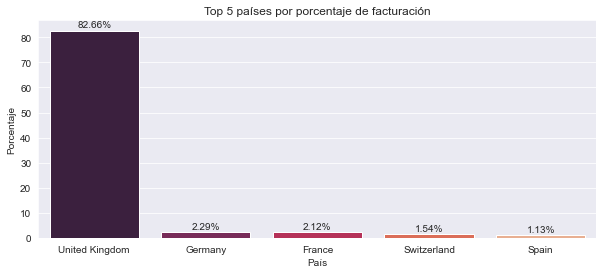

In [33]:
#Graficamos

top_5_paises = facturas_total.sort_values(by='Porcentaje', ascending=False).head()
paises = top_5_paises['País']
porcentajes = top_5_paises['Porcentaje']

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
bars = sns.barplot(x=paises.values, y=porcentajes.values, palette='rocket')

# agregar títulos y porcentajes al gráfico
plt.title('Top 5 países por porcentaje de facturación')
plt.xlabel('País')
plt.ylabel('Porcentaje')

bars.set_xticklabels(paises)

for bar, porcentaje in zip(bars.containers[0], porcentajes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.show()


Nota: A pesar de la alta representación de UK en ventas, el monto promedio de las transacciones es menor en comparación con otros países que tienen un menor número de facturas. Esto podría indicar diferencias significativas en los patrones de gasto entre los países.

## Facturación generada por mes

In [63]:
#Revisamos
df['Mes'] = df['Fecha de factura'].apply(lambda x: datetime.datetime.strftime(x, '%m'))
df['Año'] = df['Fecha de factura'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))

#Mostramos resultado
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Año,Mes,Pertenece a UK,Año-Mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021,03,SI,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021,11,SI,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021,04,SI,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021,10,SI,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021,11,NO,2021-11


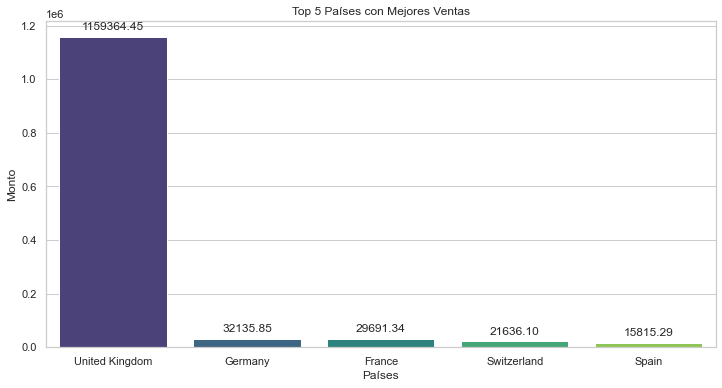

In [38]:
# Agrupar las ventas por país
ventas_por_pais = df.groupby('País')['Monto'].sum().reset_index()

# Ordenar por ventas descendentes y seleccionar las primeras 5 filas
top_5_paises = ventas_por_pais.sort_values(by='Monto', ascending=False).head()

# Graficar con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Usar un gráfico de barras
plot = sns.barplot(x='País', y='Monto', data=top_5_paises, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Top 5 Países con Mejores Ventas')
plt.xlabel('Países')
plt.ylabel('Monto')

# Mostrar valores en las barras
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()

Nota: Encontramos una brecha considerable en ventas teniendo a UK como el comercio más rentable.

## Facturación por Año

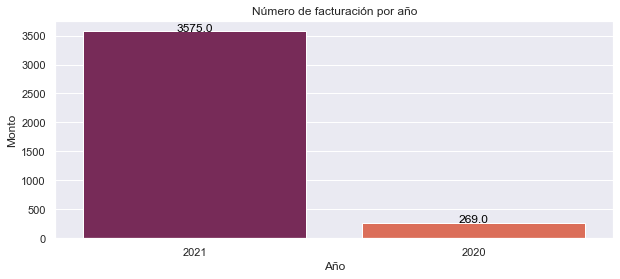

In [40]:
#Agrupar las ventas por año
ventas_por_año = df.groupby(['Año'])['Monto'].sum()

# ordenar los datos por relevancia de ventas por mes de forma descendente
ventas_por_año = ventas_por_año.sort_values(ascending=False)

# Graficar las ventas por año
año = df['Año'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = año.index, y = año.values, palette='rocket')

# agregar títulos y porcentajes al gráfico
plt.title('Número de facturación por año')
plt.xlabel('Año')
plt.ylabel('Monto')


# agregar los porcentajes a las barras del gráfico
for i, v in enumerate(año.values):
    plt.text(i, v, f'{v:.1f}', color='black', ha='center')
    
plt.show()

Nota: Notamos un increible crecimiento durante el año 2021 en comparación al anterior, aunque no podemos asegurar que marcó la diferencia debido a que solo contamos con la base de datos de un año, aún así es evidente el nivel de ventas que mantuvo en ese periodo

## Segmentación de clientes fuera de UK

Debido al amplio mercado que tiene UK Merch fuera de territorio UK, vamos a segmentar para analizar las ventas generadas y que oprtunidades podemos encontrar

In [46]:
#Segmentamos
# Segmentar directamente con una función lambda
df['Pertenece a UK'] = df['País'].apply(lambda x: 'SI' if x == 'United Kingdom' else 'NO')

# Mostrar resultado
df.head()


,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Año,Mes,Pertenece a UK,Año-Mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021,03,SI,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021,11,SI,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021,04,SI,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021,10,SI,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021,11,NO,2021-11


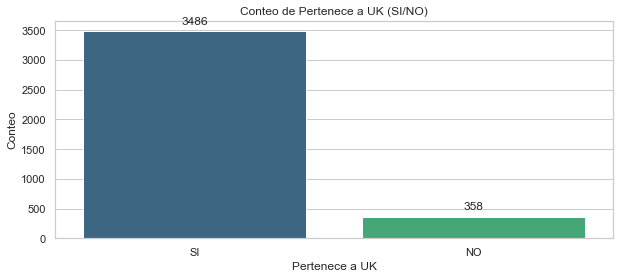

In [58]:
# Conteo de valores
conteo_por_categoria = df['Pertenece a UK'].value_counts()

# Graficar con un gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

plot = sns.barplot(x=conteo_por_categoria.index, y=conteo_por_categoria.values, palette='viridis')

# Agregar títulos y etiquetas
plt.title('Conteo de Pertenece a UK (SI/NO)')
plt.xlabel('Pertenece a UK')
plt.ylabel('Conteo')

# Mostrar valores en las barras
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()

In [48]:
#Analizamos por fechas
df['Año-Mes'] = df['Fecha de factura'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))
#Mostramos resultado
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Año,Mes,Pertenece a UK,Año-Mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021,03,SI,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021,11,SI,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021,04,SI,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021,10,SI,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021,11,NO,2021-11


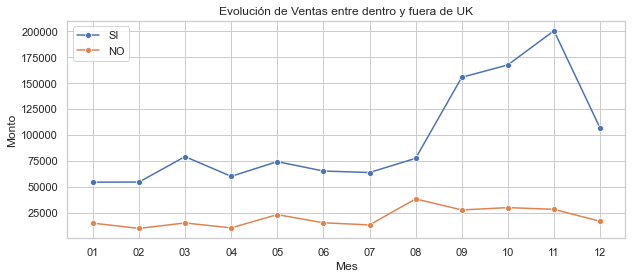

In [57]:
# Agrupar las ventas por ubicación
ventas_por_fecha_y_ubicacion = df.groupby(['Mes', 'Pertenece a UK'])['Monto'].sum().reset_index()

# Filtrar solo las categorías 'SI' y 'NO'
ventas_si = ventas_por_fecha_y_ubicacion[ventas_por_fecha_y_ubicacion['Pertenece a UK'] == 'SI']
ventas_no = ventas_por_fecha_y_ubicacion[ventas_por_fecha_y_ubicacion['Pertenece a UK'] == 'NO']

# Graficar con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Usar un gráfico de líneas
sns.lineplot(x='Mes', y='Monto', data=ventas_si, label='SI', marker='o')
sns.lineplot(x='Mes', y='Monto', data=ventas_no, label='NO', marker='o')

# Agregar títulos y etiquetas
plt.title('Evolución de Ventas entre dentro y fuera de UK')
plt.xlabel('Mes')
plt.ylabel('Monto')

plt.legend()  # Mostrar leyenda

plt.show()

En resumen, el estudio destaca la importancia de UK en términos de volumen de ventas, pero también señala diferencias notables en el comportamiento de compra entre países, así como posibles errores en la entrada de datos que deben abordarse para garantizar la integridad de los resultados.